In [10]:
import io
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")


In [11]:
train_df = pd.read_csv('train.csv')
train_df.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [12]:
print(train_df.shape)
print(train_df.columns)

(159571, 8)
Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


In [13]:
import re

# Precompile regex patterns 
pattern2 = re.compile(r"[^a-zA-Z0-9\s]")  
pattern3 = re.compile(r"\d")
pattern4 = re.compile(r"\s+")
pattern5 = re.compile(r"http\S+|www\S+|https\S+")
pattern6 = re.compile(r"\n")  

def remove_pattern(input_txt):

    # Remove patterns using compiled regex
    input_txt = pattern2.sub('', input_txt)   # Remove special characters
    input_txt = pattern3.sub('', input_txt)   # Remove numbers
    input_txt = pattern4.sub(' ', input_txt).strip()   # Remove extra white spaces
    input_txt = pattern5.sub('', input_txt)   # Remove URLs
    input_txt = pattern6.sub('', input_txt)   # Remove newline characters

    return input_txt

train_df['comment_text'] = train_df['comment_text'].apply(remove_pattern)


In [14]:
comment_lengths = np.array([len(comment) for comment in train_df['comment_text']])

print(comment_lengths.mean())

367.15825557275446


In [15]:
train_df.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

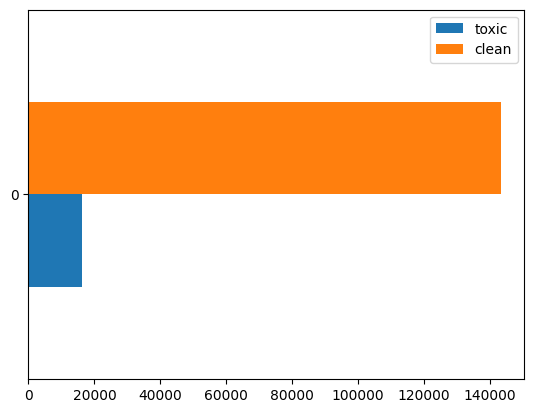

In [16]:
LABEL_COLUMNS = train_df.columns.tolist()[2:]
train_toxic = train_df[train_df[LABEL_COLUMNS].sum(axis=1) > 0]
train_clean = train_df[train_df[LABEL_COLUMNS].sum(axis=1) == 0]
pd.DataFrame(dict(
  toxic=[len(train_toxic)],
  clean=[len(train_clean)]
)).plot(kind='barh');

In [17]:
train_df = pd.concat([
  train_toxic,
  train_clean.sample(15_000)
])
train_df.shape

(31225, 8)

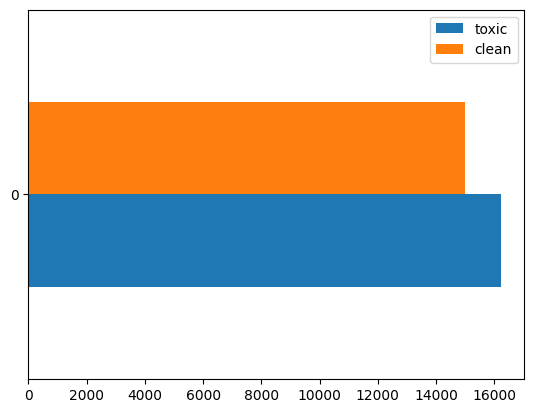

In [18]:
LABEL_COLUMNS = train_df.columns.tolist()[2:]
train_toxic = train_df[train_df[LABEL_COLUMNS].sum(axis=1) > 0]
train_clean = train_df[train_df[LABEL_COLUMNS].sum(axis=1) == 0]
pd.DataFrame(dict(
  toxic=[len(train_toxic)],
  clean=[len(train_clean)]
)).plot(kind='barh');

In [19]:
comment_lengths = np.array([len(comment) for comment in train_df['comment_text']])

print(comment_lengths.mean())

326.93895916733385


In [20]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey what is it talk What is it an exclusive gr...,1,0,0,0,0,0
16,0007e25b2121310b,Bye Dont look come or think of comming back To...,1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian Archangel WHite T...,1,0,1,0,1,1
43,00190820581d90ce,FUCK YOUR FILTHY MOTHER IN THE ASS DRY,1,0,1,0,1,0


In [21]:
train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [22]:
!pip3 install ktrain
!pip install keras_bert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 36.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 55.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 65.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.4/265.4 kB 60.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 81.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.37.6-py3-none-any.whl size=25321128 s

In [23]:
# Tensorflow
import tensorflow as tf

# ktrain
import ktrain
from ktrain import text

# sklearn
from sklearn.model_selection import train_test_split

In [24]:
X = train_df['comment_text']
y = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [25]:
# Common Parameters
max_len = 330
batch_size = 16
learning_rate = 2e-5
epochs = 10

## BERT

In [23]:
model_ = 'bert-base-uncased'
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
t_mod = text.Transformer(model_, maxlen=max_len, classes = [0,1,2,3,4,5])

'''Converting split data to list [so it can processed]'''
#train
X_tr = np.array(X_train)
y_tr =  np.array(y_train)

#test
X_ts = np.array(X_test)
y_ts =  np.array(y_test)


# Pre-processing training & test data
train = t_mod.preprocess_train(X_tr,y_tr)
test = t_mod.preprocess_train(X_ts,y_ts)

# Model Classifier
model = t_mod.get_classifier()

learner = ktrain.get_learner(model, train_data=train, val_data=test, batch_size=batch_size)
# Train Model
learner.fit_onecycle(learning_rate, epochs)

preprocessing train...
language: en
train sequence lengths:
	mean : 60
	95percentile : 207
	99percentile : 578


Is Multi-Label? True
preprocessing train...
language: en
train sequence lengths:
	mean : 59
	95percentile : 204
	99percentile : 549


Is Multi-Label? True


begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
2082/2082 [==============================] - 734s 346ms/step - loss: 0.2671 - binary_accuracy: 0.8948 - val_loss: 0.1783 - val_binary_accuracy: 0.9254
Epoch 2/10
2082/2082 [==============================] - 722s 345ms/step - loss: 0.1611 - binary_accuracy: 0.9316 - val_loss: 0.1558 - val_binary_accuracy: 0.9372
Epoch 3/10
2082/2082 [==============================] - 722s 345ms/step - loss: 0.1375 - binary_accuracy: 0.9401 - val_loss: 0.1515 - val_binary_accuracy: 0.9355
Epoch 4/10
2082/2082 [==============================] - 722s 345ms/step - loss: 0.1201 - binary_accuracy: 0.9482 - val_loss: 0.1529 - val_binary_accuracy: 0.9362
Epoch 5/10
2082/2082 [==============================] - 722s 345ms/step - loss: 0.1025 - binary_accuracy: 0.9564 - val_loss: 0.1713 - val_binary_accuracy: 0.9319
Epoch 6/10
2082/2082 [==============================] - 722s 345ms/step - loss: 0.0815 - binary_accuracy: 

In [24]:
x = learner.validate(class_names=t_mod.get_classes())


196/196 [==============================] - 54s 267ms/step
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3101
           1       0.41      0.42      0.41       326
           2       0.84      0.85      0.84      1725
           3       0.57      0.47      0.51       105
           4       0.74      0.79      0.76      1617
           5       0.65      0.57      0.61       299

   micro avg       0.81      0.83      0.82      7173
   macro avg       0.69      0.67      0.68      7173
weighted avg       0.81      0.83      0.82      7173
 samples avg       0.42      0.43      0.41      7173



In [29]:
from sklearn.metrics import accuracy_score

# Getting predictions on the test data
test_dataset = t_mod.preprocess_test(X_ts, y_ts)
y_pred = learner.predict(test_dataset)

# Calculate and print accuracy for each label
label_accuracies = []
for idx, class_name in enumerate(class_names):
    y_true = y_ts[:, idx]
    y_pred_label = y_pred[:, idx]
    accuracy = accuracy_score(y_true, y_pred_label.round())
    label_accuracies.append((class_name, accuracy))

# Calculate and print the overall accuracy
overall_accuracy = sum(acc for _, acc in label_accuracies) / len(label_accuracies)
print("\nLabel-wise Accuracies:")
for class_name, accuracy in label_accuracies:
    print(f"{class_name}: {accuracy:.4f}")

print("\nOverall Accuracy:", overall_accuracy)


preprocessing test...
language: en
test sequence lengths:
	mean : 59
	95percentile : 204
	99percentile : 549


6245/6245 [==============================] - 141s 23ms/step

Label-wise Accuracies:
toxic: 0.9102
severe_toxic: 0.9380
obscene: 0.9137
threat: 0.9851
insult: 0.8743
identity_hate: 0.9648

Overall Accuracy: 0.9310114758473444


## RoBERTa

In [26]:
model_ = 'roberta-base'
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
t_mod = text.Transformer(model_, maxlen=max_len, classes = [0,1,2,3,4,5])
'''Converting split data to list [so it can processed]'''
#train
X_tr = np.array(X_train)
y_tr =  np.array(y_train)

#test
X_ts = np.array(X_test)
y_ts =  np.array(y_test)


# Pre-processing training & test data
train = t_mod.preprocess_train(X_tr,y_tr)
test = t_mod.preprocess_train(X_ts,y_ts)

# Model Classifier
model = t_mod.get_classifier()

learner = ktrain.get_learner(model, train_data=train, val_data=test, batch_size=batch_size)
# Train Model
learner.fit_onecycle(learning_rate, epochs)

preprocessing train...
language: en
train sequence lengths:
	mean : 59
	95percentile : 205
	99percentile : 597


Is Multi-Label? True
preprocessing train...
language: en
train sequence lengths:
	mean : 57
	95percentile : 193
	99percentile : 587


Is Multi-Label? True


begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
2082/2082 [==============================] - 786s 369ms/step - loss: 0.2388 - binary_accuracy: 0.9082 - val_loss: 0.1877 - val_binary_accuracy: 0.9305
Epoch 2/10
2082/2082 [==============================] - 741s 355ms/step - loss: 0.1598 - binary_accuracy: 0.9328 - val_loss: 0.1568 - val_binary_accuracy: 0.9309
Epoch 3/10
2082/2082 [==============================] - 742s 355ms/step - loss: 0.1400 - binary_accuracy: 0.9388 - val_loss: 0.1483 - val_binary_accuracy: 0.9368
Epoch 4/10
2082/2082 [==============================] - 770s 368ms/step - loss: 0.1278 - binary_accuracy: 0.9435 - val_loss: 0.1649 - val_binary_accuracy: 0.9339
Epoch 5/10
2082/2082 [==============================] - 742s 355ms/step - loss: 0.1168 - binary_accuracy: 0.9494 - val_loss: 0.1722 - val_binary_accuracy: 0.9320
Epoch 6/10
2082/2082 [==============================] - 741s 355ms/step - loss: 0.1028 - binary_accuracy: 

In [27]:
x = learner.validate(class_names=t_mod.get_classes())

196/196 [==============================] - 55s 272ms/step
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3101
           1       0.48      0.48      0.48       326
           2       0.82      0.88      0.84      1725
           3       0.54      0.65      0.59       105
           4       0.74      0.81      0.77      1617
           5       0.61      0.61      0.61       299

   micro avg       0.80      0.85      0.83      7173
   macro avg       0.68      0.73      0.70      7173
weighted avg       0.80      0.85      0.83      7173
 samples avg       0.42      0.44      0.42      7173



In [28]:
from sklearn.metrics import accuracy_score

# Getting predictions on the test data
test_dataset = t_mod.preprocess_test(X_ts, y_ts)
y_pred = learner.predict(test_dataset)

# Calculate and print accuracy for each label
label_accuracies = []
for idx, class_name in enumerate(class_names):
    y_true = y_ts[:, idx]
    y_pred_label = y_pred[:, idx]
    accuracy = accuracy_score(y_true, y_pred_label.round())
    label_accuracies.append((class_name, accuracy))

# Calculate and print the overall accuracy
overall_accuracy = sum(acc for _, acc in label_accuracies) / len(label_accuracies)
print("\nLabel-wise Accuracies:")
for class_name, accuracy in label_accuracies:
    print(f"{class_name}: {accuracy:.4f}")

print("\nOverall Accuracy:", overall_accuracy)


preprocessing test...
language: en
test sequence lengths:
	mean : 57
	95percentile : 193
	99percentile : 587


6245/6245 [==============================] - 160s 26ms/step

Label-wise Accuracies:
toxic: 0.9095
severe_toxic: 0.9460
obscene: 0.9114
threat: 0.9848
insult: 0.8761
identity_hate: 0.9624

Overall Accuracy: 0.9317053642914331
